## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [207]:
# Bring the data.
housing_data = fetch_california_housing()

In [208]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [209]:
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
y = pd.DataFrame(housing_data.target)
y.columns = ['HouseValue']

housing_data_df = pd.concat([X, y], axis=1)
housing_data_df.shape

housing_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [210]:
housing_data_df.shape

(20640, 9)

In [211]:
housing_data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [212]:
housing_data_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HouseValue    0
dtype: int64

<AxesSubplot:>

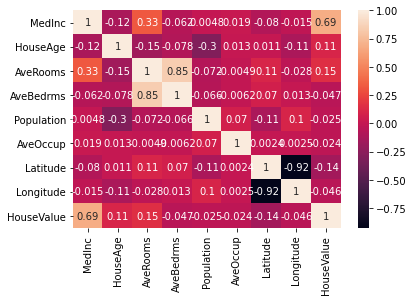

In [213]:
sns.heatmap(housing_data_df.corr(), annot=True)

In [214]:
X = X = housing_data_df.drop('HouseValue', axis=1).values
y= housing_data_df["HouseValue"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)
X_train = scale(X_train, axis=1)
X_test = scale(X_test, axis=1)

In [215]:
#tf.compat.v1.disable_eager_execution()
b1 = tf.Variable(tf.ones((X.shape[1],1)))                
b0 = tf.Variable(1.0) 
X_ph = tf.compat.v1.placeholder(tf.float32,shape=(None))   # !!! tf.placeholder for older versions !!!!
y_ph = tf.compat.v1.placeholder(tf.float32,shape=(None))

In [216]:
y_model = tf.matmul(X_ph, b1) + b0

In [217]:
loss = tf.reduce_mean(tf.square(y_ph - y_model))

In [218]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)

In [219]:
n_epochs = 75           # i cant do more epochs   !!                              # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                        # Define training.
init = tf.compat.v1.global_variables_initializer()                # Define Variable initialization.

with tf.compat.v1.Session() as sess:  # !!! tf.Session for older versions !!!
        # Variables initialization.
        sess.run(init)
        # Training.
        my_feed = {X_ph:X_train, y_ph:y_train}                        # Prepare feed data as a dictionary. 
        
        for i in range(n_epochs):
           #run training 
           sess.run(train, feed_dict = my_feed)
        
        b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
        # Testing.
        mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.

In [220]:
print(b0_model, b1_model)

1.0888896 [[0.9700996 ]
 [0.9779012 ]
 [0.9707057 ]
 [0.96930295]
 [1.2292657 ]
 [0.9698015 ]
 [0.9796205 ]
 [0.9333027 ]]


In [221]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))
# i think with more epochs rmse will be < 1

MSE  = 1.400
RMSE = 1.183


In [222]:
X_th = tf.compat.v1.placeholder(tf.float32, shape=(None))
y_model = tf.matmul(X_th, b1_model) + b0_model

In [223]:
with tf.compat.v1.Session() as sess:  # !!! tf.Session for older versions !!!
        my_feed = {X_th:X_train}
        y_pred_value = sess.run(y_model, feed_dict = my_feed)  

In [224]:
# Predicted y values.
print(y_pred_value)
# i think with more epochs rmse will be < 1

[[1.7897838]
 [1.7904167]
 [1.7892065]
 ...
 [1.7903692]
 [1.789257 ]
 [1.7854605]]
